In [ ]:
!pip install librosa scikit-learn soundfile tensorflow matplotlib

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
def extract_features(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        if pad_width > 0:
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]
        return mfccs
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None

In [ ]:
def load_data(dataset_path):
    features, labels = [], []
    for emotion in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion)
        if os.path.isdir(emotion_path):
            for file in os.listdir(emotion_path):
                if file.endswith('.wav'):
                    path = os.path.join(emotion_path, file)
                    mfccs = extract_features(path)
                    if mfccs is not None:
                        features.append(mfccs)
                        labels.append(emotion)
    return np.array(features), np.array(labels)

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maddularushikasritha","key":"460043f60cf164bd415ed2440efdd132"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ybsingh/indian-emotional-speech-corpora-iesc

Dataset URL: https://www.kaggle.com/datasets/ybsingh/indian-emotional-speech-corpora-iesc
License(s): unknown
 94% 123M/131M [00:01<00:00, 137MB/s] 
100% 131M/131M [00:01<00:00, 118MB/s]


In [ ]:
!unzip indian-emotional-speech-corpora-iesc.zip -d IESC_data

Archive:  indian-emotional-speech-corpora-iesc.zip
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-1-1-1.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-1-1-2.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-2-1-1.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-2-1-2.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-3-1-1.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-3-1-2.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-4-1-1.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-4-1-2.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-5-1-1.wav  
  inflating: IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-5-1-2.wav  
  inflating: IESC_data/Indian

In [ ]:
import os
for root, dirs, files in os.walk("IESC_data"):
    for file in files[:5]:  # Show sample files
        print(file)

H-10-5-2.wav
H-1-5-1.wav
H-6-5-2.wav
H-9-5-1.wav
H-6-5-1.wav
A-2-5-1.wav
A-7-5-1.wav
A-5-5-1.wav
A-6-5-1.wav
A-2-5-2.wav
S-2-5-2.wav
S-6-5-1.wav
S-2-5-1.wav
S-4-5-2.wav
S-8-5-1.wav
F-9-5-2.wav
F-7-5-1.wav
F-5-5-2.wav
F-2-5-2.wav
F-5-5-1.wav
N-5-5-1.wav
N-4-5-1.wav
N-7-5-1.wav
N-6-5-1.wav
N-3-5-1.wav
H-1-6-1.wav
H-6-6-2.wav
H-9-6-1.wav
H-1-6-2.wav
H-4-6-2.wav
A-3-6-2.wav
A-5-6-2.wav
A-4-6-2.wav
A-9-6-1.wav
A-10-6-1.wav
S-10-6-1.wav
S-3-6-1.wav
S-5-6-1.wav
S-7-6-1.wav
S-9-6-2.wav
F-9-6-2.wav
F-7-6-2.wav
F-5-6-2.wav
F-6-6-2.wav
F-9-6-1.wav
N-1-6-1.wav
N-9-6-1.wav
N-9-6-2.wav
N-7-6-1.wav
N-2-6-2.wav
H-5-1-2.wav
H-1-1-2.wav
H-2-1-2.wav
H-2-1-1.wav
H-4-1-2.wav
A-1-1-2.wav
A-2-1-2.wav
A-2-1-1.wav
A-1-1-1.wav
A-5-1-1.wav
S-4-1-2.wav
S-5-1-2.wav
S-3-1-2.wav
S-2-1-1.wav
S-4-1-1.wav
F-3-1-2.wav
F-2-1-1.wav
F-5-1-1.wav
F-3-1-1.wav
F-1-1-1.wav
N-2-1-1.wav
N-3-1-1.wav
N-5-1-1.wav
N-4-1-1.wav
N-3-1-2.wav
H-4-7-2.wav
H-5-7-1.wav
H-9-7-1.wav
H-8-7-2.wav
H-2-7-1.wav
A-8-7-2.wav
A-9-7-1.wav
A-9-7-2.wav
A

In [ ]:
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        return mfccs_scaled
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None

In [ ]:
import librosa

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)  # Or a specific sample rate
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        return mfccs.mean(axis=1)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [ ]:
import IPython.display as ipd

# Try playing the file
ipd.Audio("/content/IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-1-1-1.wav")

In [ ]:
import wave

try:
    with wave.open("/content/IESC_data/Indian Emotional Speech Corpora (IESC)/Speaker-1/Anger/A-1-1-1.wav", 'rb') as wf:
        print(f"Channels: {wf.getnchannels()}")
        print(f"Sample Width: {wf.getsampwidth()}")
        print(f"Frame Rate: {wf.getframerate()}")
        print(f"Frames: {wf.getnframes()}")
except wave.Error as e:
    print("Wave error:", e)

Channels: 1
Sample Width: 2
Frame Rate: 32000
Frames: 101760


In [ ]:
import librosa

def is_valid_wav(file_path):
    try:
        _ = librosa.get_duration(path=file_path)
        return True
    except Exception as e:
        print(f"Invalid WAV: {file_path}, Reason: {e}")
        return False

In [ ]:
# 📦 Load Data
features = []
labels = []

data_path = "IESC_data"  # Replace with your correct root folder

for root, _, files in os.walk(data_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            emotion = root.split('/')[-1]  # Folder name as label
            feature = extract_features(file_path)
            if feature is not None:
                features.append(feature)
                labels.append(emotion)

print(f"Total samples: {len(features)}")

Total samples: 600


In [ ]:
# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels_categorical)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(13,), activation='relu'))  # Corrected input shape
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 🏋️‍♀️ Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,125 (145.02 KB)

 Trainable params: 37,125 (145.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2171 - loss: 32.0577 - val_accuracy: 0.1583 - val_loss: 10.7755
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1861 - loss: 22.3966 - val_accuracy: 0.2250 - val_loss: 4.3454
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2571 - loss: 12.0950 - val_accuracy: 0.2333 - val_loss: 2.3369
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2428 - loss: 7.5246 - val_accuracy: 0.3083 - val_loss: 1.6590
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1878 - loss: 3.6360 - val_accuracy: 0.1583 - val_loss: 1.6104
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2145 - loss: 2.4421 - val_accuracy: 0.1500 - val_loss: 1.6106
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2233 - loss: 1.9820 - val_accuracy: 0.1500 - val_loss: 1.6108
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2104 - loss: 1.9938 - val_accuracy: 0.1500 - val

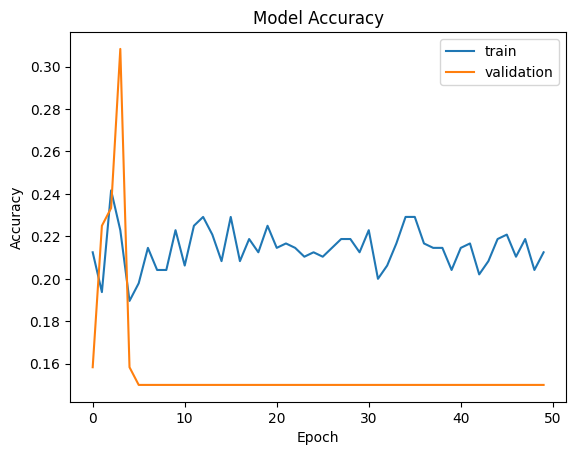

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


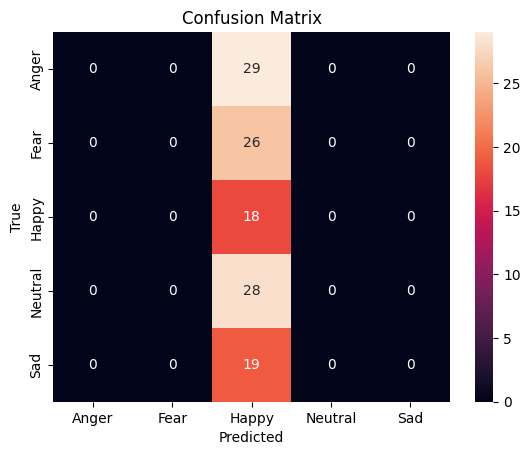

              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        29
        Fear       0.00      0.00      0.00        26
       Happy       0.15      1.00      0.26        18
     Neutral       0.00      0.00      0.00        28
         Sad       0.00      0.00      0.00        19

    accuracy                           0.15       120
   macro avg       0.03      0.20      0.05       120
weighted avg       0.02      0.15      0.04       120



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Accuracy & Loss Plot
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

In [ ]:
# Map emotion to mood-based playlist
emotion_to_music = {
    'happy': "https://open.spotify.com/playlist/happy",
    'sad': "https://open.spotify.com/playlist/sad",
    'angry': "https://open.spotify.com/playlist/angry",
    'neutral': "https://open.spotify.com/playlist/neutral"
}

def predict_emotion(file_path):
    feature = extract_features(file_path).reshape(1, -1)
    prediction = model.predict(feature)
    emotion_idx = np.argmax(prediction)
    emotion = le.inverse_transform([emotion_idx])[0]
    print(f"Detected Emotion: {emotion}")
    print("Suggested Playlist:", emotion_to_music.get(emotion, "No match"))

# Upload and test your .wav file
from google.colab import files
uploaded = files.upload()

for file in uploaded.keys():
    predict_emotion(file)

In [6]:
# 📦 Load Data
import os  # Import the os module

features = []
labels = []

data_path = "IESC_data"  # Replace with your correct root folder

for root, _, files in os.walk(data_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            emotion = root.split('/')[-1]  # Folder name as label
            feature = extract_features(file_path)
            if feature is not None:
                features.append(feature)
                labels.append(emotion)

print(f"Total samples: {len(features)}")

Total samples: 0
